In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time


In [14]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1") 
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [15]:
df.shape

(4026, 7)

In [16]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [17]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)

normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [18]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffeness Et (MS)',
       'Period (P)'],
      dtype='object')

In [19]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [20]:
y=normalized_df["Period (P)"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

In [22]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
import optuna.integration.lightgbm as oplgb
from catboost import CatBoostRegressor

In [28]:
def objective(trial):
    model = CatBoostRegressor(
        iterations=trial.suggest_int('iterations', 100, 1500),
        learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
        depth=trial.suggest_int('depth', 3, 10),
        l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
        random_seed=42,
        loss_function='RMSE',
        eval_metric='RMSE'
    )
    
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=0)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    
    return rmse

In [29]:
# Start time
start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
# End time
end_time = time.time()

# Calculate total time
total_time = end_time - start_time

print("Total time taken: ", total_time)

[I 2024-01-13 12:51:22,365] A new study created in memory with name: no-name-23bf7094-b574-4730-9c9e-17224cea9875
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:51:23,436] Trial 0 finished with value: 0.10472343666268354 and parameters: {'iterations': 729, 'learning_rate': 0.0012547141046128328, 'depth': 7, 'l2_leaf_reg': 0.1060821211208

[I 2024-01-13 12:51:35,581] Trial 8 finished with value: 0.0702974285965058 and parameters: {'iterations': 246, 'learning_rate': 0.006689447876831481, 'depth': 5, 'l2_leaf_reg': 3.006692301518689}. Best is trial 7 with value: 0.0020077391444392793.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:51:36,198] Trial 9 finished with value: 0.0

[I 2024-01-13 12:51:47,183] Trial 17 finished with value: 0.0030680446333946486 and parameters: {'iterations': 1231, 'learning_rate': 0.02284286556249015, 'depth': 6, 'l2_leaf_reg': 0.14138304308852853}. Best is trial 14 with value: 0.001929045568892043.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:51:47,819] Trial 18 finished with val

[I 2024-01-13 12:52:01,712] Trial 26 finished with value: 0.001776061155153593 and parameters: {'iterations': 1467, 'learning_rate': 0.061841971603346105, 'depth': 7, 'l2_leaf_reg': 0.15857682845126897}. Best is trial 26 with value: 0.001776061155153593.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:52:04,174] Trial 27 finished with val

[I 2024-01-13 12:52:21,130] Trial 35 finished with value: 0.001734620489486328 and parameters: {'iterations': 1269, 'learning_rate': 0.13120744656526237, 'depth': 6, 'l2_leaf_reg': 0.28347125137094076}. Best is trial 35 with value: 0.001734620489486328.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:52:22,586] Trial 36 finished with valu

[I 2024-01-13 12:52:41,930] Trial 44 finished with value: 0.003175430841272323 and parameters: {'iterations': 1152, 'learning_rate': 0.07015586747815364, 'depth': 9, 'l2_leaf_reg': 0.424091422754896}. Best is trial 35 with value: 0.001734620489486328.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:52:44,710] Trial 45 finished with value:

[I 2024-01-13 12:53:02,015] Trial 53 finished with value: 0.002166744876675017 and parameters: {'iterations': 1187, 'learning_rate': 0.15354179232962945, 'depth': 7, 'l2_leaf_reg': 0.3286146255623357}. Best is trial 47 with value: 0.0017230972201651533.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:53:03,697] Trial 54 finished with valu

[I 2024-01-13 12:53:18,061] Trial 62 finished with value: 0.0019113949774823634 and parameters: {'iterations': 1277, 'learning_rate': 0.13555364153319177, 'depth': 6, 'l2_leaf_reg': 0.41753535934973907}. Best is trial 47 with value: 0.0017230972201651533.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:53:20,041] Trial 63 finished with va

[I 2024-01-13 12:53:34,787] Trial 71 finished with value: 0.0018182765004821713 and parameters: {'iterations': 1449, 'learning_rate': 0.1134801872236587, 'depth': 6, 'l2_leaf_reg': 0.12005508163503155}. Best is trial 47 with value: 0.0017230972201651533.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:53:36,879] Trial 72 finished with val

[I 2024-01-13 12:53:53,483] Trial 80 finished with value: 0.0019558397799856364 and parameters: {'iterations': 1494, 'learning_rate': 0.14562494690198308, 'depth': 6, 'l2_leaf_reg': 0.2173495166976418}. Best is trial 47 with value: 0.0017230972201651533.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:53:55,591] Trial 81 finished with val

[I 2024-01-13 12:54:10,779] Trial 89 finished with value: 0.0019350716096661483 and parameters: {'iterations': 1272, 'learning_rate': 0.10171652688396576, 'depth': 6, 'l2_leaf_reg': 0.10949057339467322}. Best is trial 87 with value: 0.0016971651000727524.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:54:12,626] Trial 90 finished with va

[I 2024-01-13 12:54:27,398] Trial 98 finished with value: 0.0018757821389311384 and parameters: {'iterations': 1379, 'learning_rate': 0.12187341432050773, 'depth': 6, 'l2_leaf_reg': 0.19058697302526154}. Best is trial 87 with value: 0.0016971651000727524.
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate=trial.suggest_loguniform('learning_rate', 0.001, 0.2),
C:\Users\zhaokaiyang\AppData\Local\Temp\ipykernel_16144\1783297227.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  l2_leaf_reg=trial.suggest_loguniform('l2_leaf_reg', 0.1, 10),
[I 2024-01-13 12:54:29,336] Trial 99 finished with va

Total time taken:  186.97102117538452


In [16]:
best_params = study.best_params
best_value = study.best_value

print("Best Params:", best_params)
print("Best Value:", best_value)

Best Params: {'iterations': 1188, 'learning_rate': 0.1688649945042702, 'depth': 6, 'l2_leaf_reg': 0.5745035778636723}
Best Value: 0.0016730633361329516


# CatBoost

In [24]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [25]:
from catboost import CatBoostRegressor
params_best['depth'] = int(params_best['depth'])
params_best['iterations'] = int(params_best['iterations'])
cat_reg = CatBoostRegressor(**best_params)
cat_reg.fit(X_train, y_train)

0:	learn: 0.1884447	total: 145ms	remaining: 2m 52s
1:	learn: 0.1625454	total: 146ms	remaining: 1m 26s
2:	learn: 0.1400485	total: 147ms	remaining: 58.2s
3:	learn: 0.1210541	total: 149ms	remaining: 44s
4:	learn: 0.1049990	total: 150ms	remaining: 35.4s
5:	learn: 0.0915679	total: 151ms	remaining: 29.7s
6:	learn: 0.0797272	total: 152ms	remaining: 25.6s
7:	learn: 0.0710228	total: 153ms	remaining: 22.6s
8:	learn: 0.0618713	total: 154ms	remaining: 20.2s
9:	learn: 0.0548780	total: 155ms	remaining: 18.3s
10:	learn: 0.0486973	total: 156ms	remaining: 16.7s
11:	learn: 0.0440896	total: 157ms	remaining: 15.4s
12:	learn: 0.0393291	total: 158ms	remaining: 14.3s
13:	learn: 0.0352598	total: 159ms	remaining: 13.3s
14:	learn: 0.0317832	total: 160ms	remaining: 12.5s
15:	learn: 0.0293062	total: 161ms	remaining: 11.8s
16:	learn: 0.0269586	total: 162ms	remaining: 11.2s
17:	learn: 0.0248361	total: 163ms	remaining: 10.6s
18:	learn: 0.0232610	total: 164ms	remaining: 10.1s
19:	learn: 0.0216966	total: 165ms	remaini

185:	learn: 0.0031046	total: 332ms	remaining: 1.79s
186:	learn: 0.0030823	total: 333ms	remaining: 1.78s
187:	learn: 0.0030699	total: 334ms	remaining: 1.78s
188:	learn: 0.0030650	total: 335ms	remaining: 1.77s
189:	learn: 0.0030547	total: 336ms	remaining: 1.76s
190:	learn: 0.0030469	total: 337ms	remaining: 1.76s
191:	learn: 0.0030314	total: 338ms	remaining: 1.75s
192:	learn: 0.0030212	total: 339ms	remaining: 1.75s
193:	learn: 0.0030145	total: 340ms	remaining: 1.74s
194:	learn: 0.0030072	total: 341ms	remaining: 1.73s
195:	learn: 0.0029969	total: 341ms	remaining: 1.73s
196:	learn: 0.0029800	total: 342ms	remaining: 1.72s
197:	learn: 0.0029674	total: 343ms	remaining: 1.72s
198:	learn: 0.0029557	total: 344ms	remaining: 1.71s
199:	learn: 0.0029459	total: 346ms	remaining: 1.71s
200:	learn: 0.0029368	total: 347ms	remaining: 1.7s
201:	learn: 0.0029277	total: 348ms	remaining: 1.7s
202:	learn: 0.0029201	total: 349ms	remaining: 1.69s
203:	learn: 0.0029121	total: 350ms	remaining: 1.69s
204:	learn: 0.

364:	learn: 0.0020185	total: 514ms	remaining: 1.16s
365:	learn: 0.0020139	total: 515ms	remaining: 1.16s
366:	learn: 0.0020120	total: 516ms	remaining: 1.15s
367:	learn: 0.0020071	total: 517ms	remaining: 1.15s
368:	learn: 0.0020051	total: 518ms	remaining: 1.15s
369:	learn: 0.0020032	total: 519ms	remaining: 1.15s
370:	learn: 0.0019943	total: 520ms	remaining: 1.15s
371:	learn: 0.0019852	total: 521ms	remaining: 1.14s
372:	learn: 0.0019816	total: 522ms	remaining: 1.14s
373:	learn: 0.0019799	total: 523ms	remaining: 1.14s
374:	learn: 0.0019782	total: 524ms	remaining: 1.14s
375:	learn: 0.0019761	total: 525ms	remaining: 1.13s
376:	learn: 0.0019744	total: 526ms	remaining: 1.13s
377:	learn: 0.0019712	total: 528ms	remaining: 1.13s
378:	learn: 0.0019646	total: 529ms	remaining: 1.13s
379:	learn: 0.0019608	total: 531ms	remaining: 1.13s
380:	learn: 0.0019595	total: 532ms	remaining: 1.13s
381:	learn: 0.0019563	total: 533ms	remaining: 1.12s
382:	learn: 0.0019537	total: 534ms	remaining: 1.12s
383:	learn: 

546:	learn: 0.0015956	total: 706ms	remaining: 828ms
547:	learn: 0.0015941	total: 708ms	remaining: 826ms
548:	learn: 0.0015935	total: 709ms	remaining: 825ms
549:	learn: 0.0015922	total: 710ms	remaining: 824ms
550:	learn: 0.0015915	total: 711ms	remaining: 822ms
551:	learn: 0.0015889	total: 712ms	remaining: 821ms
552:	learn: 0.0015856	total: 714ms	remaining: 819ms
553:	learn: 0.0015847	total: 715ms	remaining: 818ms
554:	learn: 0.0015836	total: 716ms	remaining: 817ms
555:	learn: 0.0015825	total: 718ms	remaining: 816ms
556:	learn: 0.0015812	total: 719ms	remaining: 814ms
557:	learn: 0.0015771	total: 720ms	remaining: 813ms
558:	learn: 0.0015755	total: 721ms	remaining: 811ms
559:	learn: 0.0015739	total: 722ms	remaining: 810ms
560:	learn: 0.0015695	total: 723ms	remaining: 808ms
561:	learn: 0.0015684	total: 724ms	remaining: 807ms
562:	learn: 0.0015658	total: 726ms	remaining: 805ms
563:	learn: 0.0015636	total: 726ms	remaining: 804ms
564:	learn: 0.0015630	total: 727ms	remaining: 802ms
565:	learn: 

719:	learn: 0.0013967	total: 888ms	remaining: 577ms
720:	learn: 0.0013960	total: 890ms	remaining: 576ms
721:	learn: 0.0013956	total: 891ms	remaining: 575ms
722:	learn: 0.0013939	total: 892ms	remaining: 574ms
723:	learn: 0.0013936	total: 893ms	remaining: 572ms
724:	learn: 0.0013932	total: 894ms	remaining: 571ms
725:	learn: 0.0013916	total: 895ms	remaining: 569ms
726:	learn: 0.0013912	total: 896ms	remaining: 568ms
727:	learn: 0.0013894	total: 897ms	remaining: 567ms
728:	learn: 0.0013876	total: 898ms	remaining: 565ms
729:	learn: 0.0013873	total: 899ms	remaining: 564ms
730:	learn: 0.0013870	total: 900ms	remaining: 563ms
731:	learn: 0.0013848	total: 902ms	remaining: 562ms
732:	learn: 0.0013839	total: 903ms	remaining: 560ms
733:	learn: 0.0013835	total: 904ms	remaining: 559ms
734:	learn: 0.0013828	total: 905ms	remaining: 558ms
735:	learn: 0.0013819	total: 906ms	remaining: 556ms
736:	learn: 0.0013813	total: 907ms	remaining: 555ms
737:	learn: 0.0013806	total: 908ms	remaining: 554ms
738:	learn: 

892:	learn: 0.0012834	total: 1.07s	remaining: 354ms
893:	learn: 0.0012828	total: 1.07s	remaining: 353ms
894:	learn: 0.0012825	total: 1.07s	remaining: 351ms
895:	learn: 0.0012821	total: 1.07s	remaining: 350ms
896:	learn: 0.0012818	total: 1.07s	remaining: 349ms
897:	learn: 0.0012816	total: 1.08s	remaining: 348ms
898:	learn: 0.0012811	total: 1.08s	remaining: 346ms
899:	learn: 0.0012807	total: 1.08s	remaining: 345ms
900:	learn: 0.0012802	total: 1.08s	remaining: 344ms
901:	learn: 0.0012799	total: 1.08s	remaining: 343ms
902:	learn: 0.0012797	total: 1.08s	remaining: 342ms
903:	learn: 0.0012794	total: 1.08s	remaining: 340ms
904:	learn: 0.0012791	total: 1.08s	remaining: 339ms
905:	learn: 0.0012789	total: 1.08s	remaining: 338ms
906:	learn: 0.0012785	total: 1.09s	remaining: 337ms
907:	learn: 0.0012783	total: 1.09s	remaining: 335ms
908:	learn: 0.0012782	total: 1.09s	remaining: 334ms
909:	learn: 0.0012774	total: 1.09s	remaining: 333ms
910:	learn: 0.0012769	total: 1.09s	remaining: 332ms
911:	learn: 

1062:	learn: 0.0012157	total: 1.26s	remaining: 148ms
1063:	learn: 0.0012156	total: 1.26s	remaining: 147ms
1064:	learn: 0.0012154	total: 1.26s	remaining: 146ms
1065:	learn: 0.0012152	total: 1.26s	remaining: 144ms
1066:	learn: 0.0012146	total: 1.26s	remaining: 143ms
1067:	learn: 0.0012142	total: 1.26s	remaining: 142ms
1068:	learn: 0.0012140	total: 1.26s	remaining: 141ms
1069:	learn: 0.0012137	total: 1.27s	remaining: 140ms
1070:	learn: 0.0012135	total: 1.27s	remaining: 139ms
1071:	learn: 0.0012132	total: 1.27s	remaining: 137ms
1072:	learn: 0.0012126	total: 1.27s	remaining: 136ms
1073:	learn: 0.0012125	total: 1.27s	remaining: 135ms
1074:	learn: 0.0012122	total: 1.27s	remaining: 134ms
1075:	learn: 0.0012120	total: 1.27s	remaining: 133ms
1076:	learn: 0.0012113	total: 1.28s	remaining: 132ms
1077:	learn: 0.0012111	total: 1.28s	remaining: 130ms
1078:	learn: 0.0012109	total: 1.28s	remaining: 129ms
1079:	learn: 0.0012107	total: 1.28s	remaining: 128ms
1080:	learn: 0.0012103	total: 1.28s	remaining:

In [26]:
y_pred= cat_reg.predict(X_test)
y_pred1=cat_reg.predict(X_val)
y_pred2=cat_reg.predict(X_train)

In [27]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.00127144509049857
mean_squared_error: 4.447789602984712e-06
rmse: 0.0021089783315588408
r2 score: 0.9999107923031522


In [28]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.00046441433189459613
mean_squared_error: 1.3960283753628107e-06
rmse: 0.0011815364469041194
r2 score: 0.9999714602893142


In [29]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.0014089494746147395
mean_squared_error: 1.369040715611874e-05
rmse: 0.0037000550206880358
r2 score: 0.9997327692793445


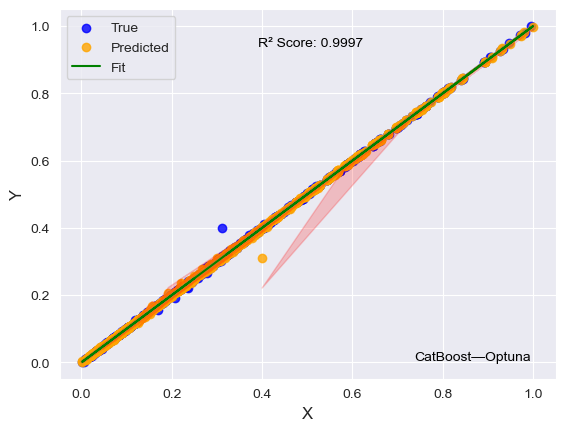

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

r2 = r2_score(y_test, y_pred)

slope, intercept, _, _, _ = stats.linregress(y_test, y_pred)
fit_line = intercept + slope * y_test

sns.set_style('darkgrid')
sns.regplot(x=y_pred, y=y_test, label='True', scatter_kws={'color': 'blue'})
sns.regplot(x=y_test, y=y_pred, label='Predicted', scatter_kws={'color': 'orange'})
plt.plot(y_test, fit_line, label='Fit', color='green')
plt.fill_between(y_test, y_pred - (y_pred - y_test), y_pred + (y_pred - y_test), alpha=0.2, color='red')

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.text(0.95, 0.05, 'CatBoost—Optuna', transform=plt.gca().transAxes, ha='right', color='black')

plt.text(0.4, 0.9, f'R² Score: {r2:.4f}', transform=plt.gca().transAxes, ha='left', color='black')
plt.show()